In [1]:
using Base: show_supertypes # import the function from the `Base` package

function subtypetree(t, level=1, indent=4)
    if level == 1
        println(t)
    end
    for s in subtypes(t)
        #fill (" ",12) return column vector 12*1
        println(join(fill(" ", level * indent)) * string(s))  # print type
        subtypetree(s, level+1, indent)  # recursively print the next type, indenting
    end
end

subtypetree (generic function with 3 methods)

In [2]:

struct MyType
    hoge::Float64
end

hoge=MyType(2.3)
@show supertype(typeof(hoge))



import Base.show  # to extend an existing function

function show(io::IO, x::MyType)
    str = "(MyType.hoge = $(x.hoge))"  # custom display
    print(io, str)
end
show(myval)  # 

supertype(typeof(hoge)) = Any


LoadError: UndefVarError: myval not defined

In [3]:
using Distributions
d1 = Normal(1.0, 2.0) # an example type to explore
@show d1
show_supertypes(typeof(d1))

d1 = Normal{Float64}(μ=1.0, σ=2.0)
Normal{Float64} <: Distribution{Univariate,Continuous} <: Sampleable{Univariate,Continuous} <: Any

In [4]:
#drawo random numver from normal distribution with mean:1 variance:2
@show rand(d1);

rand(d1) = 2.6170853451985687


In [5]:
#d can be any distribution,not limited to normal distribution
function simulateprocess(x₀; a = 1.0, b = 1.0, N = 5, d::Sampleable{Univariate,Continuous})
    x = zeros(typeof(x₀), N+1) 
    x[1] = x₀
    for t in 2:N+1
        x[t] = a * x[t-1] + b * rand(d) # draw
    end
    return x
end

@show simulateprocess(0.0, d=Normal(0.2, 2.0))

simulateprocess(0.0, d = Normal(0.2, 2.0)) = [0.0, -4.026501813244329, -0.48370527224873516, 0.33002087075876485, 1.2853069579774405, -2.1499563237273502]


6-element Array{Float64,1}:
  0.0
 -4.026501813244329
 -0.48370527224873516
  0.33002087075876485
  1.2853069579774405
 -2.1499563237273502

In [6]:
d1 = Normal(1.0, 2.0)
@show d1
@show supertype(typeof(d1))

d2 = Exponential(0.1)
@show d2
@show supertype(typeof(d2))

d1 = Normal{Float64}(μ=1.0, σ=2.0)
supertype(typeof(d1)) = Distribution{Univariate,Continuous}
d2 = Exponential{Float64}(θ=0.1)
supertype(typeof(d2)) = Distribution{Univariate,Continuous}


Distribution{Univariate,Continuous}

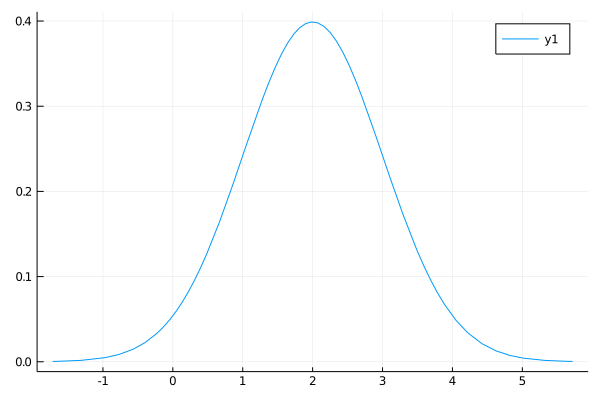

In [7]:
#if error occured ,(v0.7) pkg> build GR
using StatsPlots
d = Normal(2.0, 1.0)
plot(d) # note no o

In [8]:
#cerate own distribution
struct OurTruncatedExponential <: Distribution{Univariate,Continuous}
    α::Float64
    xmax::Float64
end

Distributions.pdf(d::OurTruncatedExponential, x) = d.α *exp(-d.α * x)/exp(-d.α * d.xmax)
Distributions.minimum(d::OurTruncatedExponential) = 0
Distributions.maximum(d::OurTruncatedExponential) = d.xmax

In [9]:
d = OurTruncatedExponential(1.0,2.0)
@show minimum(d), maximum(d)
@show support(d)

(minimum(d), maximum(d)) = (0, 2.0)
support(d) = RealInterval(0.0, 2.0)


RealInterval(0.0, 2.0)

In [13]:
a = 1.0 + 1.0im
b = 0.0 + 2.0im
@show typeof(a)
@show typeof(a) <: Number
@show a + b
@show 1.0im*a
@show a * b
@show -a
@show a - b
@show zero(a)
@show one(a);

@show (1+1im)^2

typeof(a) = Complex{Float64}
typeof(a) <: Number = true
a + b = 1.0 + 3.0im
(1.0im) * a = -1.0 + 1.0im
a * b = -2.0 + 2.0im
-a = -1.0 - 1.0im
a - b = 1.0 - 1.0im
zero(a) = 0.0 + 0.0im
one(a) = 1.0 + 0.0im
(1 + 1im) ^ 2 = 0 + 2im


0 + 2im

In [17]:
a=BigInt(3)
b=3
c=3.3
@show a+b
@show a+c
@show typeof(a+c)

a + b = 6
a + c = 6.29999999999999982236431605997495353221893310546875
typeof(a + c) = BigFloat


BigFloat

In [19]:
x = 4.0 + 1.0im
@show x, typeof(x)

xbig = BigFloat(4.0) + 1.0im
@show xbig, typeof(xbig);

(x, typeof(x)) = (4.0 + 1.0im, Complex{Float64})
(xbig, typeof(xbig)) = (4.0 + 1.0im, Complex{BigFloat})


In [23]:
@show supertype(BigFloat)
@show supertype(AbstractFloat)

supertype(BigFloat) = AbstractFloat
supertype(AbstractFloat) = Real


Real

In [25]:
x=2+3im
@which +(x,x)

+(z::Complex, w::Complex) in Base at complex.jl:275

In [27]:
isless(1.0, 2.0)  # applied to two floats
@which isless(1.0, 2.0)

isless(x::Float64, y::Float64) in Base at float.jl:465

## problem1

In [31]:
using LinearAlgebra
function trap_weights(x)
    return step(x) * [0.5; ones(length(x) - 2); 0.5]
end
x = range(0.0, 1.0, length = 100)
@show step(x)
ω = trap_weights(x)
@show ω
f(x) = x^2

jsindot(f.(x), ω)

step(x) = 0.010101010101010102
ω = [0.005050505050505051, 0.010101010101010102, 0.010101010101010102, 0.010101010101010102, 0.010101010101010102, 0.010101010101010102, 0.010101010101010102, 0.010101010101010102, 0.010101010101010102, 0.010101010101010102, 0.010101010101010102, 0.010101010101010102, 0.010101010101010102, 0.010101010101010102, 0.010101010101010102, 0.010101010101010102, 0.010101010101010102, 0.010101010101010102, 0.010101010101010102, 0.010101010101010102, 0.010101010101010102, 0.010101010101010102, 0.010101010101010102, 0.010101010101010102, 0.010101010101010102, 0.010101010101010102, 0.010101010101010102, 0.010101010101010102, 0.010101010101010102, 0.010101010101010102, 0.010101010101010102, 0.010101010101010102, 0.010101010101010102, 0.010101010101010102, 0.010101010101010102, 0.010101010101010102, 0.010101010101010102, 0.010101010101010102, 0.010101010101010102, 0.010101010101010102, 0.010101010101010102, 0.010101010101010102, 0.010101010101010102, 0.0101010101010101

0.3333503384008434

In [50]:
using Base:Base

struct Squares
           count::Int
       end


function tmp(S,state)
    if ! state>S.count
           return (state*state, state+1)
    end
    return nothing
end

    




Base.iterate(S::Squares, state=1) =state > S.count  ? nothing : (state*state, state+1)

for i in (Squares(199))
    println(i)
end

1
4
9
16
25
36
49
64
81
100
121
144
169
196
225
256
289
324
361
400
441
484
529
576
625
676
729
784
841
900
961
1024
1089
1156
1225
1296
1369
1444
1521
1600
1681
1764
1849
1936
2025
2116
2209
2304
2401
2500
2601
2704
2809
2916
3025
3136
3249
3364
3481
3600
3721
3844
3969
4096
4225
4356
4489
4624
4761
4900
5041
5184
5329
5476
5625
5776
5929
6084
6241
6400
6561
6724
6889
7056
7225
7396
7569
7744
7921
8100
8281
8464
8649
8836
9025
9216
9409
9604
9801
10000
10201
10404
10609
10816
11025
11236
11449
11664
11881
12100
12321
12544
12769
12996
13225
13456
13689
13924
14161
14400
14641
14884
15129
15376
15625
15876
16129
16384
16641
16900
17161
17424
17689
17956
18225
18496
18769
19044
19321
19600
19881
20164
20449
20736
21025
21316
21609
21904
22201
22500
22801
23104
23409
23716
24025
24336
24649
24964
25281
25600
25921
26244
26569
26896
27225
27556
27889
28224
28561
28900
29241
29584
29929
30276
30625
30976
31329
31684
32041
32400
32761
33124
33489
33856
34225
34596
34969
35344
35721
36100
36

In [35]:
struct UniformTrapezoidal
    count::Int
    Δ::Float64
end

Base.iterate(S::UniformTrapezoidal, state=1) = state > S.count  ? nothing : (S.Δ, state+1)


In [37]:
hoge=UniformTrapezoidal(100,1.0e-10)

UniformTrapezoidal(100, 1.0e-10)

In [43]:
for (i,ele ) in enumerate(hoge)
    println(ele)
    println(i)
    
end

    
    

1.0e-10
1
1.0e-10
2
1.0e-10
3
1.0e-10
4
1.0e-10
5
1.0e-10
6
1.0e-10
7
1.0e-10
8
1.0e-10
9
1.0e-10
10
1.0e-10
11
1.0e-10
12
1.0e-10
13
1.0e-10
14
1.0e-10
15
1.0e-10
16
1.0e-10
17
1.0e-10
18
1.0e-10
19
1.0e-10
20
1.0e-10
21
1.0e-10
22
1.0e-10
23
1.0e-10
24
1.0e-10
25
1.0e-10
26
1.0e-10
27
1.0e-10
28
1.0e-10
29
1.0e-10
30
1.0e-10
31
1.0e-10
32
1.0e-10
33
1.0e-10
34
1.0e-10
35
1.0e-10
36
1.0e-10
37
1.0e-10
38
1.0e-10
39
1.0e-10
40
1.0e-10
41
1.0e-10
42
1.0e-10
43
1.0e-10
44
1.0e-10
45
1.0e-10
46
1.0e-10
47
1.0e-10
48
1.0e-10
49
1.0e-10
50
1.0e-10
51
1.0e-10
52
1.0e-10
53
1.0e-10
54
1.0e-10
55
1.0e-10
56
1.0e-10
57
1.0e-10
58
1.0e-10
59
1.0e-10
60
1.0e-10
61
1.0e-10
62
1.0e-10
63
1.0e-10
64
1.0e-10
65
1.0e-10
66
1.0e-10
67
1.0e-10
68
1.0e-10
69
1.0e-10
70
1.0e-10
71
1.0e-10
72
1.0e-10
73
1.0e-10
74
1.0e-10
75
1.0e-10
76
1.0e-10
77
1.0e-10
78
1.0e-10
79
1.0e-10
80
1.0e-10
81
1.0e-10
82
1.0e-10
83
1.0e-10
84
1.0e-10
85
1.0e-10
86
1.0e-10
87
1.0e-10
88
1.0e-10
89
1.0e-10
90
1.0e-10
91
1.0e-10
